<a href="https://colab.research.google.com/github/chemjen/cats_dogs_CV/blob/master/cats_dogs_lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [0]:
# https://towardsdatascience.com/importing-data-to-google-colab-the-clean-way-5ceef9e9e3c8


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras import optimizers
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.preprocessing import image
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
from keras.layers import Dropout

In [0]:
# Construct the path
datadir = "data"
traindir = '%s/train/' % (datadir)
validdir = '%s/valid/' % (datadir)
testdir = '%s/test/' % (datadir)

In [0]:
## the images will be resized to (image_width x image_height)
image_width = 150
image_height = 150
image_size = (image_width, image_height)

## load in 20-image size batches so as not to kill memory
batch_size = 20

In [0]:
# All images will be rescaled by 1./255 --> A byte is 2^8 = 256
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        traindir, # directory
        target_size=image_size, #resize
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validdir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [0]:
## create Neural Net like LeNet model

## Sequential() object for sequential layers
lenet_model = Sequential()

## first layer: convolutional layer with 6 nodes and 5x5 kernel
lenet_model.add(Conv2D(6, (5, 5), activation='relu', name='conv1',
                        input_shape=(150, 150, 3)))
## second layer: subsampling with max pooling --> halve the size so (2,2) kernel
lenet_model.add(MaxPooling2D((2, 2), name='pool1'))

## third layer: another 5X5 convolution into 16 nodes
lenet_model.add(Conv2D(16, (5, 5), activation='relu', name='conv2'))

## fourth layer: maxpooling --> end up with 
lenet_model.add(MaxPooling2D((2, 2), name='pool2'))

## output is flatten()ed before put into fully-connected layers
lenet_model.add(Flatten(name='flatten'))

## fully connected layers are called "Dense" in Keras (Dense refers to hidden layers)
lenet_model.add(Dense(120, activation='relu', name='fc1'))
lenet_model.add(Dense(84, activation='relu', name='fc2'))

## final layer is of size 1, because binary classifier (0=cats, 1=dogs)
lenet_model.add(Dense(1, activation='sigmoid', name='predictions'))

In [0]:
lenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 146, 146, 6)       456       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 73, 73, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 69, 69, 16)        2416      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 34, 34, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 120)               2219640   
_________________________________________________________________
fc2 (Dense)                  (None, 84)               

In [0]:
lenet_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
best_model = ModelCheckpoint("./lenet/cats_and_dogs_lenet.h5", monitor='val_loss', verbose=0, save_best_only=True)

history = lenet_model.fit_generator(
        train_generator,
        steps_per_epoch=100, #2000/20 20 is the batch size
        validation_steps=8, #160/20
        epochs=10,
        validation_data=validation_generator,
        callbacks=[best_model, TensorBoard(log_dir='./lenet/logs')])




Epoch 1/10
100/100 [==============================] - 14s 145ms/step - loss: 0.6932 - accuracy: 0.5480 - val_loss: 0.6194 - val_accuracy: 0.6812

Epoch 2/10
100/100 [==============================] - 13s 126ms/step - loss: 0.6235 - accuracy: 0.6640 - val_loss: 0.7078 - val_accuracy: 0.7125
Epoch 3/10
100/100 [==============================] - 13s 128ms/step - loss: 0.5421 - accuracy: 0.7315 - val_loss: 0.5131 - val_accuracy: 0.7375
Epoch 4/10
100/100 [==============================] - 12s 121ms/step - loss: 0.4157 - accuracy: 0.8100 - val_loss: 1.2689 - val_accuracy: 0.6687
Epoch 5/10
100/100 [==============================] - 12s 123ms/step - loss: 0.2600 - accuracy: 0.8930 - val_loss: 0.5060 - val_accuracy: 0.6375
Epoch 6/10
100/100 [==============================] - 12s 122ms/step - loss: 0.1613 - accuracy: 0.9470 - val_loss: 1.2057 - val_accuracy: 0.6562
Epoch 7/10
100/100 [==============================] - 12s 122ms/step - loss: 0.0835 - accuracy: 0.9710 - val_loss: 1.1520 - va

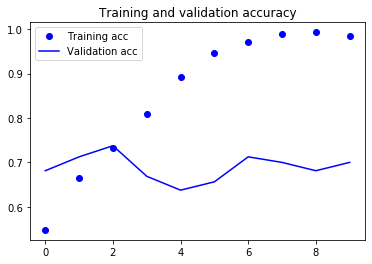

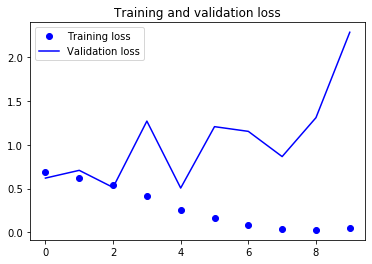

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## This is overfitting -- 
solutions to overfitting: dropout, regularization, and __image augmentation__

In [0]:
## image augmentation
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

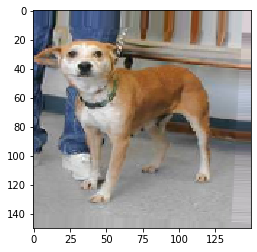

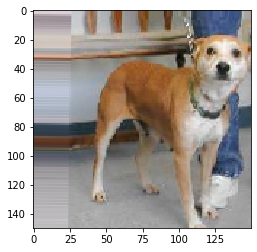

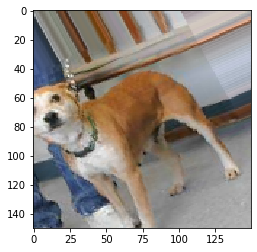

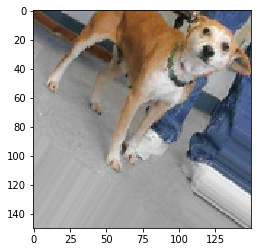

In [0]:
fnames = [os.path.join(testdir, fname) for fname in os.listdir(testdir)]

# We pick one image to "augment"
img_path = fnames[5]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3) because the flow method requires the input array to be of rank 4
x = np.expand_dims(x, axis=0)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        traindir, 
        target_size=image_size,  
        batch_size=batch_size,
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1.0/255) # we only need to scale the input for validation set
validation_generator = validation_datagen.flow_from_directory(
        validdir,  
        target_size=image_size,  
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [0]:
## because the augmented images are highly correlated, there is still a good likelihood of overfitting
## add a dropout layer to the NN to help with overfitting, with 50% probability

lenet_model = Sequential()
lenet_model.add(Conv2D(6, (5, 5), activation='relu',name='conv1',
                        input_shape=(150, 150, 3)))
lenet_model.add(MaxPooling2D((2, 2), name='pool1'))
lenet_model.add(Conv2D(16, (5, 5), activation='relu', name='conv2'))
lenet_model.add(MaxPooling2D((2, 2), name='pool2'))
lenet_model.add(Flatten(name='flatten'))
# The new dropout layer
lenet_model.add(Dropout(0.5))
lenet_model.add(Dense(120, activation='relu', name='fc1'))
lenet_model.add(Dense(84, activation='relu', name='fc2'))
lenet_model.add(Dense(1, activation='sigmoid', name='predictions'))

lenet_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
best_model = ModelCheckpoint("./lenet/cats_and_dogs_lenet.h5", monitor='val_loss', verbose=0, save_best_only=True)

history = lenet_model.fit_generator(
        train_generator,
        steps_per_epoch=101, #2000/20 20 is the batch size
        validation_steps=8, #160/20
        epochs=10,
        validation_data=validation_generator,
        callbacks=[best_model, TensorBoard(log_dir='./lenet/logs')])

Epoch 1/10
101/101 [==============================] - 19s 189ms/step - loss: 0.6305 - accuracy: 0.6381 - val_loss: 0.5441 - val_accuracy: 0.6750
Epoch 2/10
101/101 [==============================] - 19s 188ms/step - loss: 0.6253 - accuracy: 0.6480 - val_loss: 0.5493 - val_accuracy: 0.7125
Epoch 3/10
101/101 [==============================] - 17s 171ms/step - loss: 0.6428 - accuracy: 0.6188 - val_loss: 0.6231 - val_accuracy: 0.6313
Epoch 4/10
101/101 [==============================] - 17s 169ms/step - loss: 0.6390 - accuracy: 0.6351 - val_loss: 0.5463 - val_accuracy: 0.6938
Epoch 5/10
101/101 [==============================] - 17s 173ms/step - loss: 0.6019 - accuracy: 0.6683 - val_loss: 0.5066 - val_accuracy: 0.6938
Epoch 6/10
101/101 [==============================] - 24s 233ms/step - loss: 0.6029 - accuracy: 0.6683 - val_loss: 0.6439 - val_accuracy: 0.7188
Epoch 7/10
101/101 [==============================] - 20s 201ms/step - loss: 0.6228 - accuracy: 0.6530 - val_loss: 0.5201 - val_ac

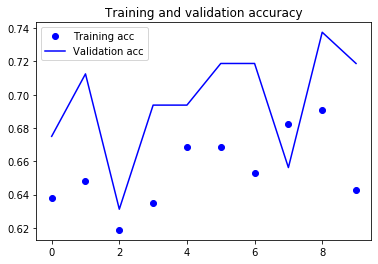

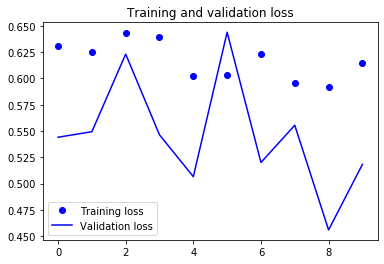

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()